# Processing and Machine Learning for MALES

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
import datetime
print(f"Notebook last run (end-to-end): {datetime.datetime.now()}")

Notebook last run (end-to-end): 2024-08-06 12:53:04.802992


In [11]:
df = pd.read_csv("Male.csv")

In [12]:
df

,Unnamed: 0,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,0,55.0,0,748,0,45,0,263358.03,1.3,137,1,1,88,0
1,1,65.0,0,56,0,25,0,305000.00,5.0,130,1,0,207,0
2,3,60.0,1,754,1,40,1,328000.00,1.2,126,1,0,90,0
3,4,95.0,1,582,0,30,0,461000.00,2.0,132,1,0,50,1
4,5,70.0,0,232,1,30,0,302000.00,1.2,132,1,0,210,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,4984,55.0,0,748,0,45,0,263000.00,1.3,137,1,0,88,0
3224,4988,55.0,0,60,0,35,0,228000.00,1.2,135,1,1,90,0
3225,4989,60.0,1,154,0,25,0,210000.00,1.7,135,1,0,82,1
3226,4990,75.0,0,119,0,50,1,248000.00,1.1,148,1,0,209,0


In [13]:
df = shuffle(df)

## Train - Test Split

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X = df[["ejection_fraction","serum_creatinine","serum_sodium","platelets","diabetes","anaemia","creatinine_phosphokinase","smoking","age","high_blood_pressure"]]
y = df[["DEATH_EVENT"]]

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 4)


In [17]:
X_train

,ejection_fraction,serum_creatinine,serum_sodium,platelets,diabetes,anaemia,creatinine_phosphokinase,smoking,age,high_blood_pressure
2491,38,4.0,131,368000.0,0,1,81,1,75.0,1
2314,20,1.3,136,254000.0,1,0,364,1,72.0,1
1963,35,0.9,137,255000.0,0,1,129,0,40.0,0
2596,20,1.1,136,319000.0,0,0,789,1,49.0,1
437,38,1.1,140,25100.0,1,0,5209,0,42.0,0
...,...,...,...,...,...,...,...,...,...,...
57,35,3.5,134,226000.0,1,0,582,0,69.0,0
451,25,1.0,138,166000.0,0,0,582,0,58.0,0
524,40,0.6,138,216000.0,0,1,1807,1,60.0,0
38,35,0.9,136,179000.0,1,1,106,1,63.0,0


In [18]:
y_train

,DEATH_EVENT
2491,1
2314,1
1963,0
2596,1
437,0
...,...
57,1
451,0
524,0
38,0


### Sythethic Minority Oversampling Technique (SMOTE)

In [19]:
df["DEATH_EVENT"].value_counts()

DEATH_EVENT
0    2154
1    1074
Name: count, dtype: int64

In [20]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state = 2)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train.values.ravel())
X_train_balanced.shape

(2620, 10)

In [21]:
np.unique(y_train_balanced, return_counts = True)

(array([0, 1]), array([1310, 1310]))

# Regression

## Linear Regression

In [22]:
from sklearn.linear_model import LinearRegression
linearRegression = LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, positive=False)
linearRegression.fit(X_train_balanced, y_train_balanced)

LinearRegression(n_jobs=1)

In [23]:
linearRegression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}

In [24]:
param_space = {'copy_X': [True,False],
               'fit_intercept': [True,False],
               'n_jobs': [1,5,10,15,None],
               'positive': [True,False]}

In [25]:
grid_search = GridSearchCV(linearRegression, param_space, cv=5)

grid_search.fit(X_train_balanced, y_train_balanced)

# Parameter which gives the best results
print(f"Best Hyperparameters: {grid_search.best_params_}")

print(f"Best Score: {grid_search.best_score_}")

Best Hyperparameters: {'copy_X': True, 'fit_intercept': True, 'n_jobs': 1, 'positive': False}
Best Score: 0.18622373113981194


In [26]:
y_linearRegressionP = linearRegression.predict(X_test)
print(linearRegression.score(X_test,y_test))

0.20242183989440843


In [27]:
mse = mean_squared_error(y_test, y_linearRegressionP)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_linearRegressionP)
print(f"MAE: {mae}")

r2 = r2_score(y_test, y_linearRegressionP)
print(f"R2: {r2}")

MSE: 0.1806627790893744
MAE: 0.36081836658366373
R2: 0.20242183989440843


## Catboost Regressor

    

In [28]:
pip install catboost


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 8.0 MB/s eta 0:00:00


In [29]:
from catboost import CatBoostRegressor

In [30]:
catmodel = CatBoostRegressor()
catmodel.fit(X_train, y_train, verbose = 100)

Learning rate set to 0.045448
0:	learn: 0.4594573	total: 47.9ms	remaining: 47.9s
100:	learn: 0.2193361	total: 157ms	remaining: 1.39s
200:	learn: 0.1533391	total: 282ms	remaining: 1.12s
300:	learn: 0.1143418	total: 435ms	remaining: 1.01s
400:	learn: 0.0922091	total: 701ms	remaining: 1.05s
500:	learn: 0.0792347	total: 899ms	remaining: 896ms
600:	learn: 0.0697888	total: 1.02s	remaining: 678ms
700:	learn: 0.0629299	total: 1.13s	remaining: 481ms
800:	learn: 0.0585635	total: 1.35s	remaining: 336ms
900:	learn: 0.0544126	total: 1.61s	remaining: 177ms
999:	learn: 0.0510270	total: 1.72s	remaining: 0us


In [31]:
parameters = {'depth'         : [6,8,10],
                  'learning_rate' : [0.01, 0.05, 0.1],
                  'iterations'    : [30, 50, 100]
                 }

In [32]:
grid_search = GridSearchCV(estimator=catmodel, param_grid = parameters, cv = 2, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

0:	learn: 0.4651036	total: 35.5ms	remaining: 3.52s
1:	learn: 0.4386351	total: 64.4ms	remaining: 3.15s
2:	learn: 0.4148852	total: 88.6ms	remaining: 2.86s
3:	learn: 0.3894135	total: 105ms	remaining: 2.51s
4:	learn: 0.3673246	total: 127ms	remaining: 2.42s
5:	learn: 0.3457489	total: 143ms	remaining: 2.25s
6:	learn: 0.3263479	total: 163ms	remaining: 2.16s
7:	learn: 0.3115182	total: 180ms	remaining: 2.07s
8:	learn: 0.2971059	total: 206ms	remaining: 2.08s
9:	learn: 0.2828556	total: 224ms	remaining: 2.02s
10:	learn: 0.2666979	total: 249ms	remaining: 2.02s
11:	learn: 0.2537125	total: 263ms	remaining: 1.93s
12:	learn: 0.2426058	total: 275ms	remaining: 1.84s
13:	learn: 0.2334013	total: 288ms	remaining: 1.77s
14:	learn: 0.2252574	total: 337ms	remaining: 1.91s
15:	learn: 0.2159879	total: 371ms	remaining: 1.95s
16:	learn: 0.2073050	total: 427ms	remaining: 2.08s
17:	learn: 0.2007323	total: 457ms	remaining: 2.08s
18:	learn: 0.1926327	total: 482ms	remaining: 2.05s
19:	learn: 0.1862234	total: 502ms	rema

GridSearchCV(cv=2,
             estimator=<catboost.core.CatBoostRegressor object at 0x7e0b9e550490>,
             n_jobs=-1,
             param_grid={'depth': [6, 8, 10], 'iterations': [30, 50, 100],
                         'learning_rate': [0.01, 0.05, 0.1]})

In [33]:
print("\n The best score across ALL searched params:\n", grid_search.best_score_)
print("\n The best parameters across ALL searched params:\n", grid_search.best_params_)


 The best score across ALL searched params:
 0.8618995009499073

 The best parameters across ALL searched params:
 {'depth': 10, 'iterations': 100, 'learning_rate': 0.1}


In [34]:
y_testpredictions = catmodel.predict(X_test)

mse = mean_squared_error(y_test, y_testpredictions)
mae = mean_absolute_error(y_test, y_testpredictions)
r2 = r2_score(y_test, y_testpredictions)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"r2: {r2}")



MSE: 0.013037171219409527
MAE: 0.045370489415276556
r2: 0.942444353582017


## Random Forest Regression

In [35]:
from sklearn.ensemble import RandomForestRegressor

randomForest = RandomForestRegressor(n_estimators=10, random_state=0, oob_score=True)

randomForest.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:578: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(


RandomForestRegressor(n_estimators=10, oob_score=True, random_state=0)

In [ ]:
randomForest.get_params()

In [ ]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [ ]:
grid_search = GridSearchCV(estimator=randomForest, param_grid = param_grid, cv = 3, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

GridSearchCV(cv=3,
             estimator=RandomForestRegressor(n_estimators=10, oob_score=True,
                                             random_state=0),
             n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]})

In [ ]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [36]:
y_randomForest = randomForest.predict(X_test)


In [37]:
mse = mean_squared_error(y_test, y_randomForest)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, y_randomForest)
print(f"MAE: {mae}")

r2 = r2_score(y_test, y_randomForest)
print(f"R2: {r2}")

MSE: 0.01973434324604796
MAE: 0.03551883813595562
R2: 0.9128781188000619


# Classification

In [38]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve, auc, precision_recall_curve, PrecisionRecallDisplay, classification_report

## Random Forest Classifier

In [39]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()
RFC.fit(X_train_balanced, y_train_balanced)


RandomForestClassifier()

In [ ]:
RFC.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
param_grid = {
    'n_estimators': [50,100, 200],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [ ]:
grid_search = GridSearchCV(estimator=RFC, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

grid_search.fit(X_train_balanced, y_train_balanced)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
1620 fits failed out of a total of 4860.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
886 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/ut

Best parameters found:  {'bootstrap': False, 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


In [40]:
print(RFC.score(X_test, y_test))

0.9852941176470589


In [41]:
YRFC = RFC.predict(X_test)

In [42]:
accuracy = accuracy_score(y_test,YRFC)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, YRFC)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, YRFC)
print(f"Recall Score : {recall}")

confusion_m = confusion_matrix(y_test, YRFC)

roc_auc = roc_auc_score(y_test, YRFC)

print(f"ROC AUC Score : {roc_auc}")

prc = precision_recall_curve(y_test, YRFC)
print(f"Precision Recall Curve : {prc}")

precision, recall, thresholds = precision_recall_curve(y_test, YRFC)
auc_precision_recall = auc(recall, precision)
print(f"Precision Recall AUC : {auc_precision_recall}")




Accuracy : 0.9852941176470589
Precision Score : 0.9820224719101124
Recall Score : 0.9754464285714286
ROC AUC Score : 0.9829838777928233
Precision Recall Curve : (array([0.34674923, 0.98202247, 1.        ]), array([1.        , 0.97544643, 0.        ]), array([0, 1]))
Precision Recall AUC : 0.982991416185043


In [43]:
print(classification_report(y_test, YRFC))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       844
           1       0.98      0.98      0.98       448

    accuracy                           0.99      1292
   macro avg       0.98      0.98      0.98      1292
weighted avg       0.99      0.99      0.99      1292



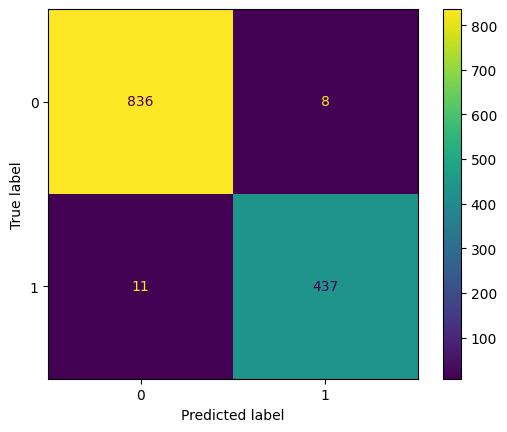

In [44]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

In the Confusion Matrix, the Columns correspond to the predictions made by the ml model, whereas the Rows represent the actual values of the test dataset or known truth.

In our case there are two categories to choose from which is death_event is false or death_event is true.

The top left contains the true negatives, these are patients that have mortality that were correctly predicted by the algorithm.

The true postives are on the bottom right, these are the patients that are survivors that were correctly predicted by the algorithm.

However the bottom left is false negatives, where the patient does have mortality, but the ml predictions state they dont.

The top right is false postives where the patient does not mortality but the ml algorithm states that they have.




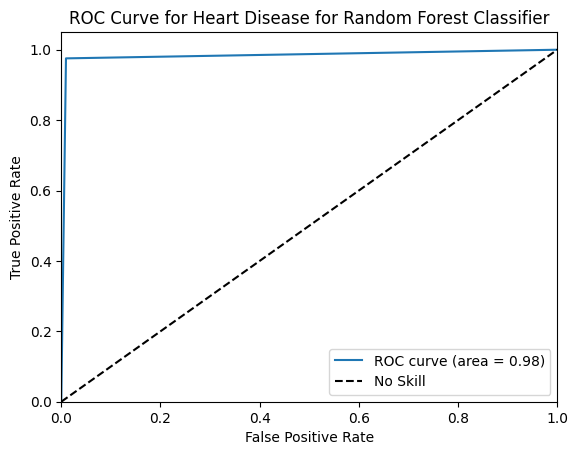

In [45]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, YRFC)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Random Forest Classifier')
plt.legend()
plt.show()

Reciever Operator Characteristc ROC graphs provides a way to summurize all the information.

Y axis shows the true postive rate, which is the same as sensitvity. The X axis shows the false positive rate same thing as specitivity.

The true postive rate tells you the proportion of the true samples were correctly classified, i.e the proportion of mortality patients that were correctly classified.

The false postive rate tells you the proportion of the false samples were incorrectly classified, for instance the proportion of survivors that were incorrectly classified as mortality.

The no skill line shows where the True postive rate = False postive rate. Therefore it means that at any point on this line means that the proportion of correctly identified postives is the same as the proportion of the incorrectly classifed postives.

ROC Graph summarizes all of the confusion matrices that each classification threshold produced. From the ROC graph we can determine what threshold or cut off value is the best for each ml model for making a decision.

Area Under the Curve or AUC makes it easier to compare one ROC curve to another. If the AUC for model A is greater then the AUC for model B, we can state that model A is better then model B.

ROC curves make it easy to determine the best threshold for making a decision. Classifiers that give curves closer to the top-left corner indicate a better performance as they are better able to have a greater proportion of true postives compared to false postives. i.e if there is a point of (x = 10,y =100) we can infer that for 10 false postives the model will have 100 true postives, i.e 10:100.






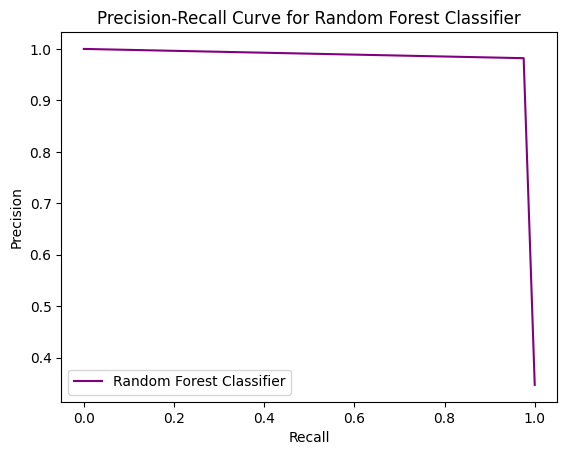

In [46]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, YRFC)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "Random Forest Classifier")



#add axis labels to plot
ax.set_title('Precision-Recall Curve for Random Forest Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

ROC and AUC has its limitations when we deal with inbalanced datasets, where the balance between postives and negatives are not 50:50.

Precision is how many instances of the predicted postive datapoints are actually positve. The Precision is not influcened by the number of negative datapoints, therefore its preferred with inbalanced datasets. Each point in the precsion graph is a threshold in which the precision and recall is calculated.

Recall is in the x axis in the precision recall graph.

Precision measures the percentage of correct predictions, while recall measures the percentage of relevant data points that were correctly identified.

Precision
The number of true positives divided by the number of true positives plus the number of false positives

Recall
The number of true positives divided by the number of true positives plus the number of false negatives



## Support Vector Machine (SVM)

In [47]:
from sklearn.svm import SVC
from sklearn.inspection import DecisionBoundaryDisplay

In [48]:
svm = SVC(kernel = "rbf", gamma = 0.5, C=1.0)
svm.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(gamma=0.5)

In [40]:
svm.get_params()

{'C': 1.0,
 'break_ties': False,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 0.5,
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [41]:
param_grid = {
    'C': [0.1, 1, 10, 100],                # Regularization parameter
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],  # Kernel type to be used in the algorithm
    'gamma': ['scale', 'auto'],            # Kernel coefficient for 'rbf', 'poly', and 'sigmoid'
    'degree': [2, 3, 4],                   # Degree of the polynomial kernel function (if 'poly')
    'coef0': [0.0, 0.1, 0.5],              # Independent term in kernel function (for 'poly' and 'sigmoid')
}

In [ ]:
grid_search = GridSearchCV(estimator=svm, param_grid = param_grid, cv = 3, n_jobs=-1)
grid_search.fit(X_train_balanced, y_train_balanced)

In [49]:
y_svm = svm.predict(X_test)

In [50]:
accuracy = accuracy_score(y_test,y_svm)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, y_svm)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, y_svm)
print(f"Recall Score : {recall}")

confusion_m = confusion_matrix(y_test, y_svm)

roc_auc = roc_auc_score(y_test, y_svm)
print(f"ROC AUC Score : {roc_auc}")

prc = precision_recall_curve(y_test, y_svm)
print(f"Precision Recall Curve : {prc}")

Accuracy : 0.9373065015479877
Precision Score : 0.997289972899729
Recall Score : 0.8214285714285714
ROC AUC Score : 0.9101218686526743
Precision Recall Curve : (array([0.34674923, 0.99728997, 1.        ]), array([1.        , 0.82142857, 0.        ]), array([0, 1]))


In [51]:
print(classification_report(y_test, y_svm))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       844
           1       1.00      0.82      0.90       448

    accuracy                           0.94      1292
   macro avg       0.96      0.91      0.93      1292
weighted avg       0.94      0.94      0.94      1292



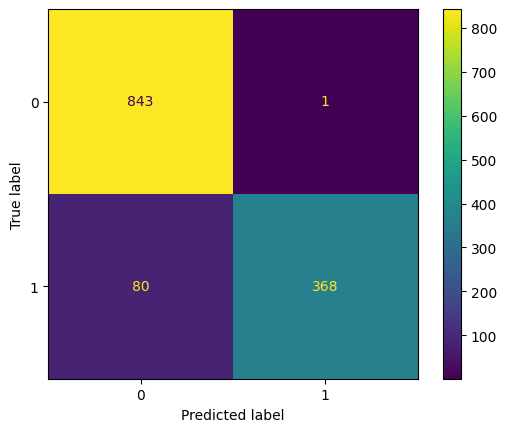

In [52]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

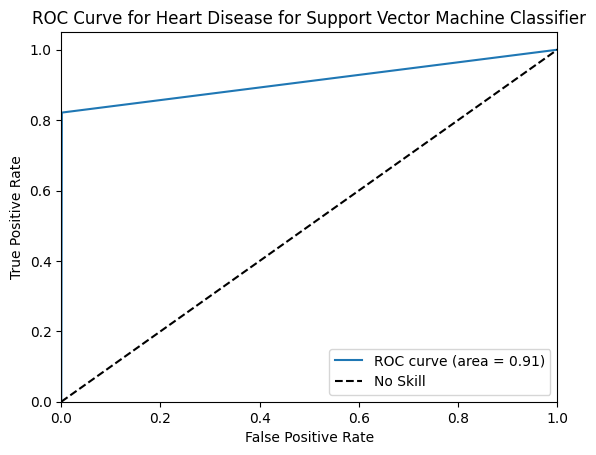

In [53]:
fpr, tpr, thresholds = roc_curve(y_test, y_svm)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Support Vector Machine Classifier')
plt.legend()
plt.show()

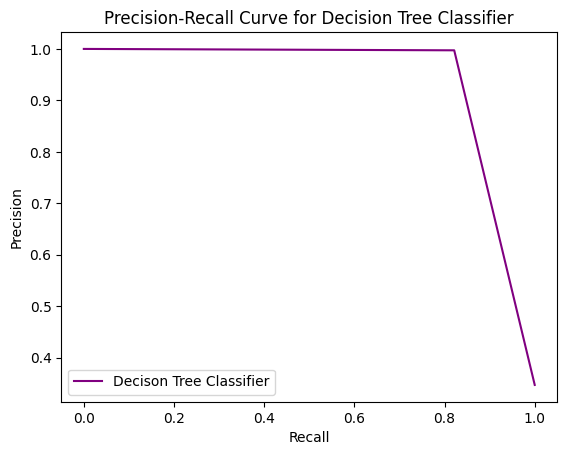

In [54]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, y_svm)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "Decison Tree Classifier")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Decision Tree Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

##  KNN Classifier

In [55]:
from sklearn.neighbors import KNeighborsClassifier

In [56]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier()

In [57]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

In [58]:
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=5, scoring='accuracy')

grid_search.fit(X_train_balanced, y_train_balanced)

best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

Best parameters found:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'distance'}


In [59]:
yknn = knn.predict(X_test)

In [60]:
accuracy = accuracy_score(y_test,yknn)
print(f"Accuracy : {accuracy}")

precision = precision_score(y_test, yknn)
print(f"Precision Score : {precision}")

recall = recall_score(y_test, yknn)
print(f"Recall Score : {recall}")

confusion_m = confusion_matrix(y_test, yknn)

roc_auc = roc_auc_score(y_test, yknn)
print(f"ROC AUC Score: {roc_auc}")

Accuracy : 0.934984520123839
Precision Score : 0.9080717488789237
Recall Score : 0.9040178571428571
ROC AUC Score: 0.9277198290453622


In [61]:
print(classification_report(y_test,yknn))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       844
           1       0.91      0.90      0.91       448

    accuracy                           0.93      1292
   macro avg       0.93      0.93      0.93      1292
weighted avg       0.93      0.93      0.93      1292



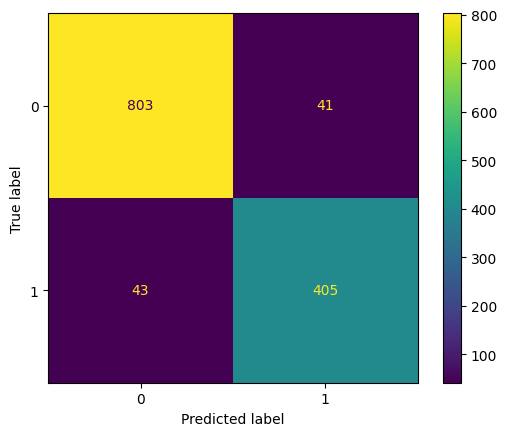

In [62]:
cmd = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_m)
cmd.plot()
plt.show()

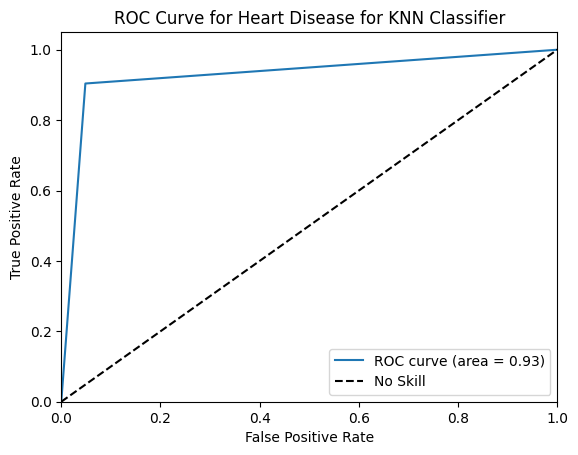

In [63]:
fpr, tpr, thresholds = roc_curve(y_test, yknn)
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for KNN Classifier')
plt.legend()
plt.show()

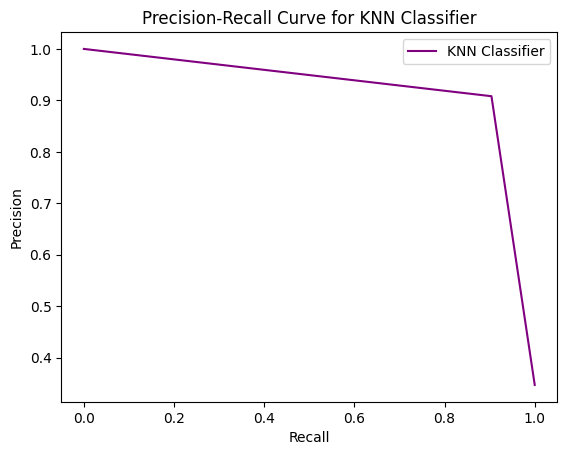

In [64]:
#calculate precision and recall
precision, recall, thresholds = precision_recall_curve(y_test, yknn)

#create precision recall curve
fig, ax = plt.subplots()
ax.plot(recall, precision, color='purple', label = "KNN Classifier")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for KNN Classifier')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

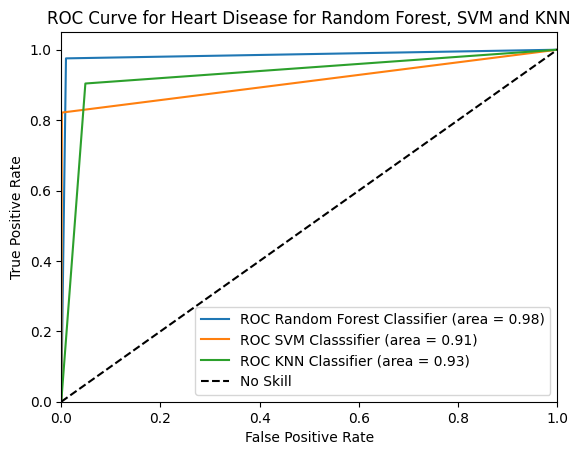

In [65]:
fpr, tpr, thresholds = roc_curve(y_test, YRFC)
fpr2, tpr2, thresholds = roc_curve(y_test, y_svm)
fpr3, tpr3, thresholds = roc_curve(y_test, yknn)
roc_auc = auc(fpr, tpr)
roc_auc2 = auc(fpr2, tpr2)
roc_auc3 = auc(fpr3, tpr3)
# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, label='ROC Random Forest Classifier (area = %0.2f)' % roc_auc)
plt.plot(fpr2, tpr2, label='ROC SVM Classsifier (area = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, label='ROC KNN Classifier (area = %0.2f)' % roc_auc3)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Heart Disease for Random Forest, SVM and KNN')
plt.legend()
plt.show()

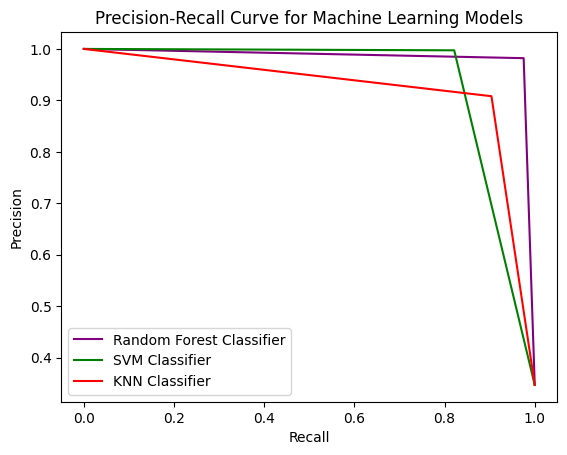

In [66]:
#calculate precision and recall
precision1, recall1, thresholds1 = precision_recall_curve(y_test, YRFC)
precision2, recall2, thresholds2 = precision_recall_curve(y_test, y_svm)
precision3, recall3,thresholds3 = precision_recall_curve(y_test, yknn)


#create precision recall curve
fig, ax = plt.subplots()
plt.plot(recall1, precision1, color='purple', label = "Random Forest Classifier")
plt.plot(recall2, precision2, color='green', label = "SVM Classifier")
plt.plot(recall3, precision3, color='red', label = "KNN Classifier")

#add axis labels to plot
ax.set_title('Precision-Recall Curve for Machine Learning Models')
ax.set_ylabel('Precision')
ax.set_xlabel('Recall')

#display plot
plt.legend()
plt.show()

# Artifical Neural Networks

In [ ]:
pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import SGD

## Single Layer Perceptron

In [ ]:
singleLModel = Sequential([
Dense(10, activation='sigmoid')
])

In [ ]:
singleLModel.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mse"])

In [ ]:
singleLModel.fit(X_train_balanced, y_train_balanced, validation_data = (X_test, y_test), epochs = 500, batch_size = 50, verbose = 1)

In [ ]:
ySingleLModel = singleLModel.predict(X_test)

In [ ]:
ySingleLModel

In [ ]:
y_test

In [ ]:
from tensorflow.keras.losses import MeanAbsoluteError, MeanSquaredError
#from tensorflow.keras.metrics import R2Score
mean_squared_error = MeanSquaredError()
mean_absolute_error = MeanAbsoluteError()


mse = mean_squared_error(y_test, ySingleLModel)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, ySingleLModel)
print(f"MAE: {mae}")


## Multilayer Perceptron

In [ ]:
mlpModel = Sequential([
    Dense(300, activation = "sigmoid"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(30, activation = "relu"),
    Dense(500, activation = "sigmoid")
])

In [ ]:
opt = SGD(learning_rate = 0.05, momentum=0.99)
mlpModel.compile(optimizer = "adam", loss = "mean_squared_error", metrics = ["mse"])

In [ ]:
mlpModel.fit(X_train_balanced, y_train_balanced, validation_data = (X_test, y_test), epochs = 500, batch_size = 50, verbose = 1)

In [ ]:
yMLP = mlpModel.predict(X_test)

In [ ]:
mlpModel.evaluate(X_test, y_test)

In [ ]:
mean_squared_error = MeanSquaredError()
mean_absolute_error = MeanAbsoluteError()

mse = mean_squared_error(y_test, yMLP)
print(f"MSE: {mse}")

mae = mean_absolute_error(y_test, yMLP)
print(f"MAE: {mae}")
